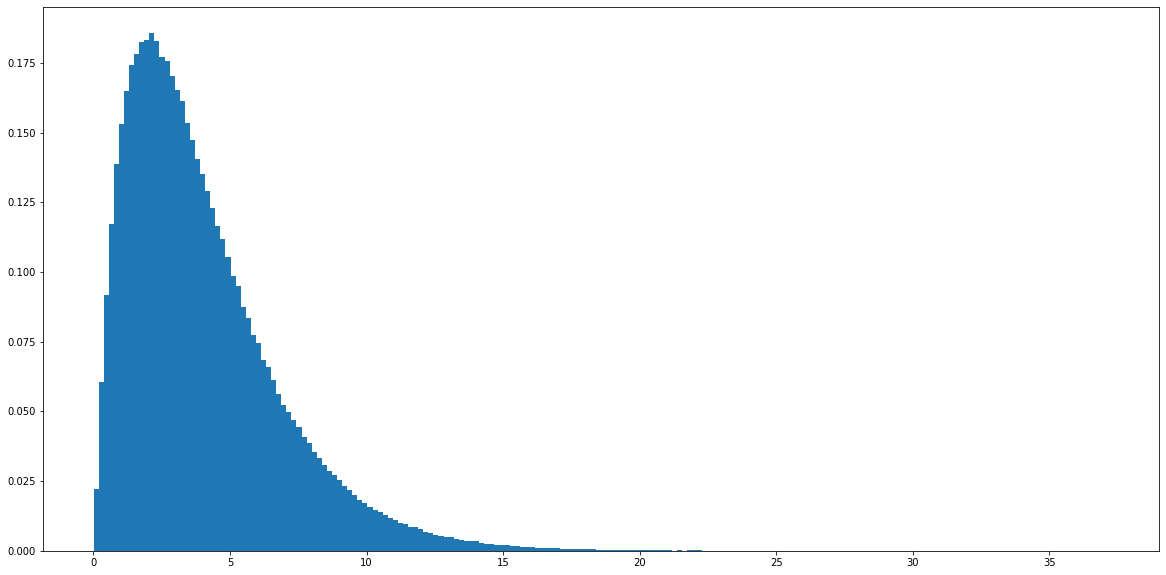

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Central limit theorom
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
# plot
plt.figure(figsize=(20,10))
plt.hist(s, 200, density=True)
plt.show()

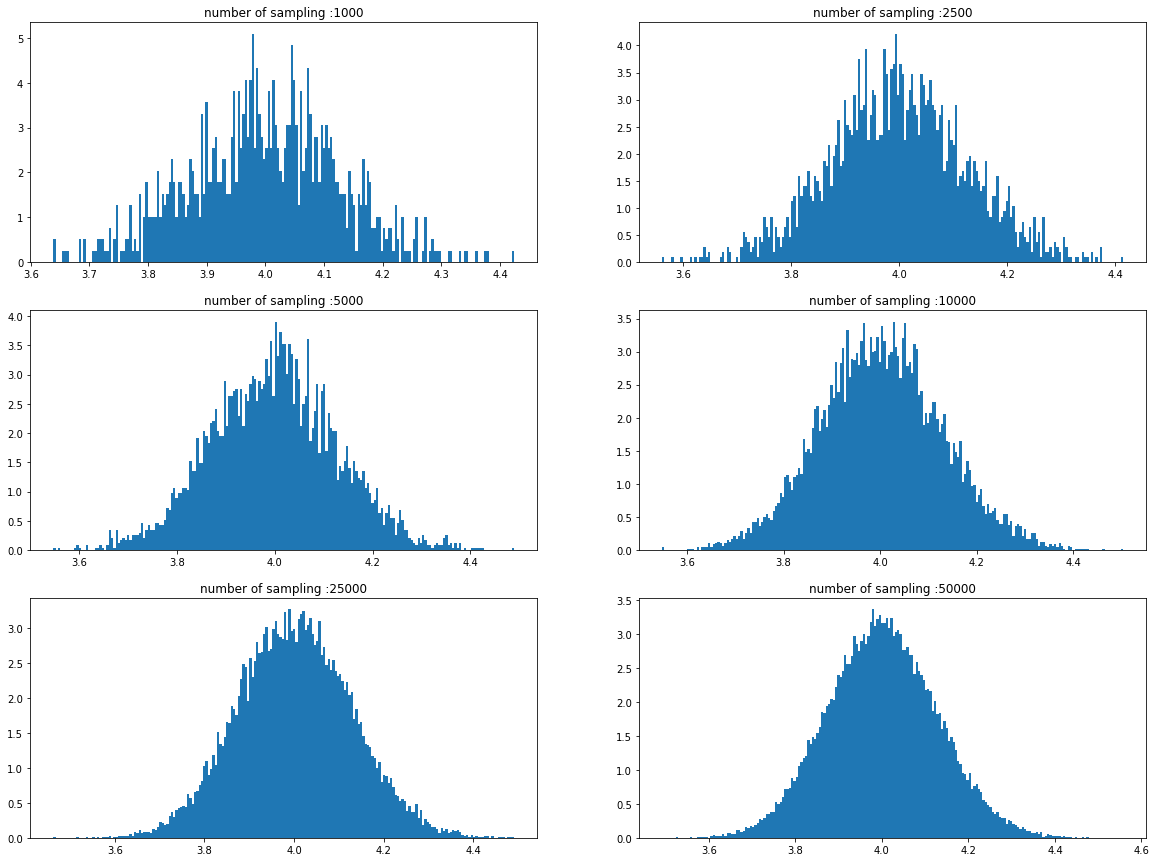

In [2]:
## sample from population with different number of sampling
# a list of sample mean
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)
    
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
        n += 1

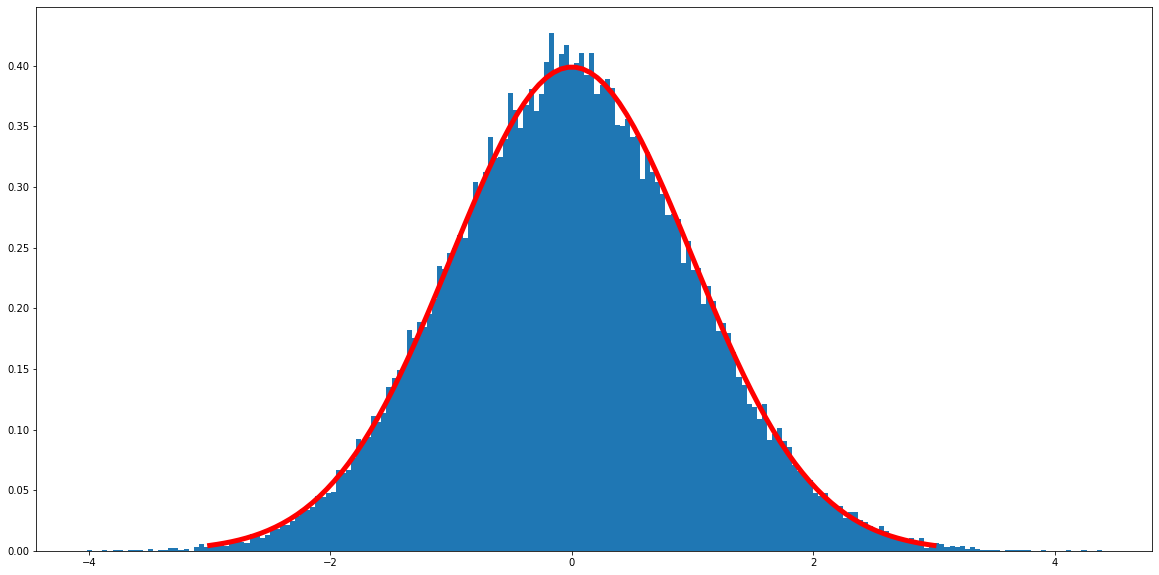

In [3]:
## standardize part
# list of standarded sample
zn = []
# use last sampling
sm = meansample[len(meansample)-1]
# calculate start deviation
std = np.std(sm)
# set population mean
mean = np.mean(sm)
# for each sample subtract with mean and devided by standard deviation
for i in sm:
    zn.append((i-mean)/std)
    
# plot hist
plt.figure(figsize=(20,10))
plt.hist(zn, 200, density=True)
# compare with standard normal disrtibution line
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# draw standard normal disrtibution line
plt.plot(x, stats.norm.pdf(x, mu, sigma),linewidth = 5, color='red')
plt.show()

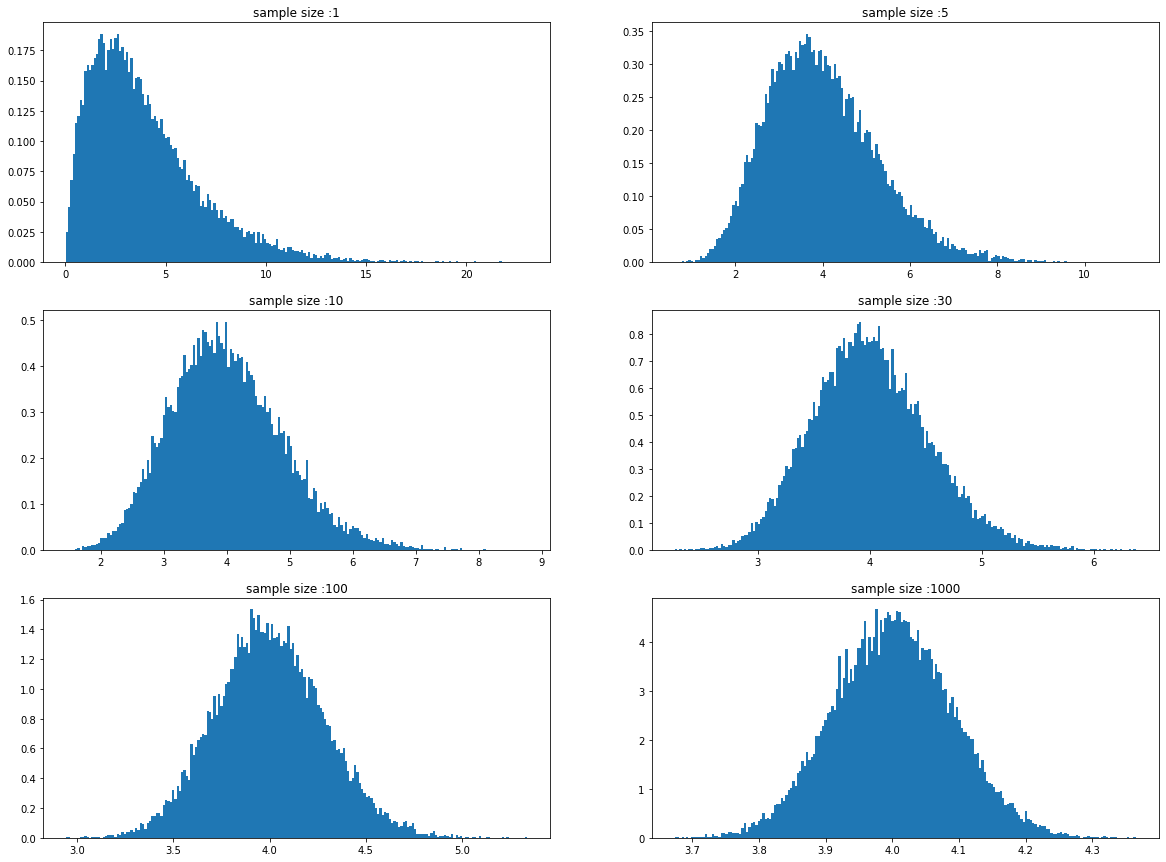

In [4]:
## sample with different sample size
# list of sample mean
meansample = []
# number of sampling
numofsample = 25000
# sample size
samplesize = [1,5,10,30,100,1000]
# for each sample size (1 to 1000)
for i in samplesize:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,numofsample):
        # sampling i sample from population
        rc = random.choices(s, k=i)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)
    
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="sample size :" + str(samplesize[n]))
        n += 1

In [5]:
## expect value of sample
# use last sampling
sample = meansample[5]
# expected value of sample equal to expect value of population
print("expected value of sample:", np.mean(sample))
print("expected value of population:", shape*scale)
# standard deviation of sample equl to standard deviation of population divided by squre root of n
print("standard deviation of sample:", np.std(sample))
print("standard deviation of population:", scale*np.sqrt(shape))
print("standard deviation of population divided by squre root of sample size:", scale*np.sqrt(shape)/np.sqrt(1000))

expected value of sample: 4.001876028102197
expected value of population: 4.0
standard deviation of sample: 0.08944017145485578
standard deviation of population: 2.8284271247461903
standard deviation of population divided by squre root of sample size: 0.0894427190999916


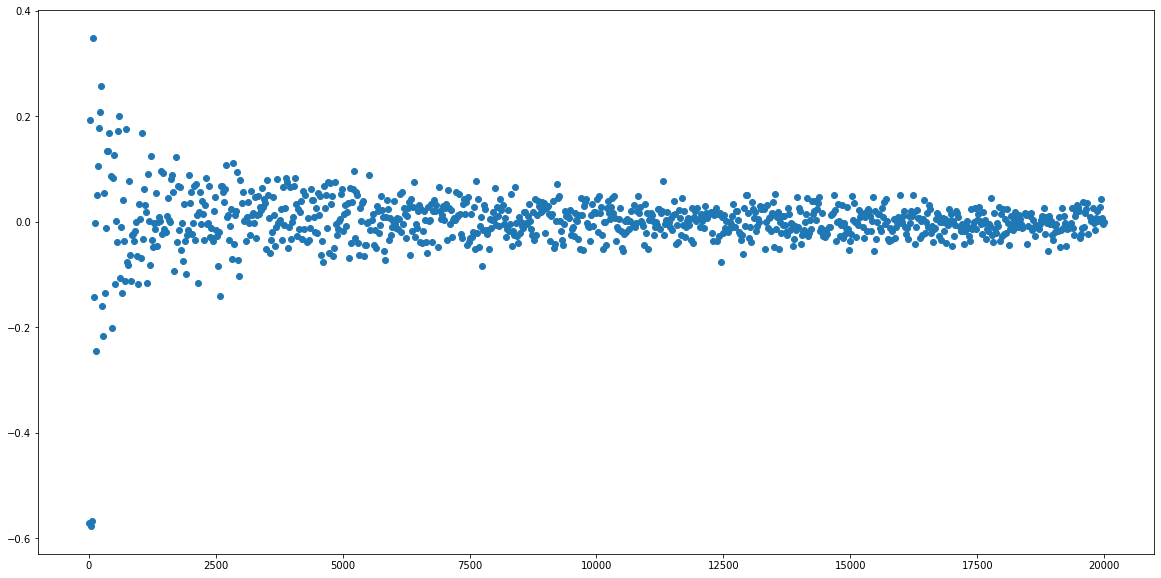

In [6]:
## show that as the sample size increases the mean of sample is close to population mean
# set expected values of population
mu = shape*scale # mean
# sample size
samplesize = []
# collect difference between sample mean and mu
diflist = []
# for each sample size
for n in range(10,20000,20): 
    # sample 10000 sample
    rs = random.choices(s, k=n)
    # start count
    c = 0
    # calculate mean
    mean = sum(rs)/len(rs)
    # collect difference between sample mean and mu
    diflist.append(mean-mu)
    samplesize.append(n)

# set figure size.
plt.figure(figsize=(20,10))
# plot each diference.
plt.scatter(samplesize,diflist, marker='o')
# show plot.
plt.show()

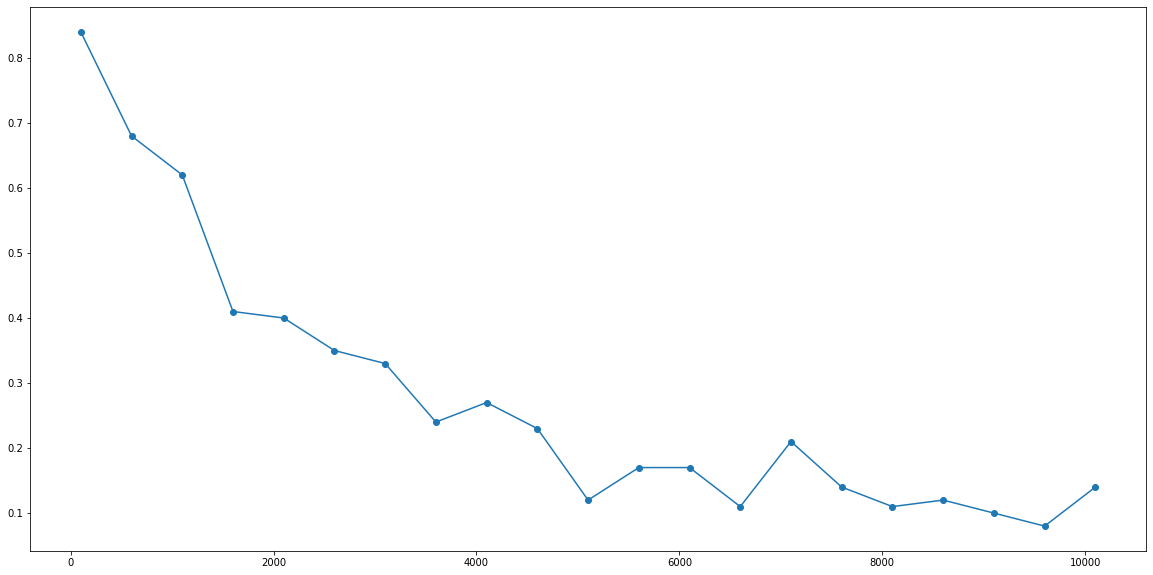

In [7]:
## show that as the sample size increases the probability that sample mean is further from population mean than error
# margin of error
epsilon = 0.05
# list of probability of each sample size
proberror = []
# sample size for plotting
samplesize = []

# for each sample size
for n in range(100,10101,500): 
    # start count
    c = 0
    for i in range(0,100):
        # sample 10000 sample
        rs = random.choices(s, k=n)
        # calculate mean
        mean = sum(rs)/len(rs)
        # check if the difference is larger than error
        if abs(mean - mu) > epsilon:
            # if larger count the sampling
            c += 1
    # calculate the probability
    proberror.append(c/100)
    # save sample size for plotting
    samplesize.append(n)

# set figure size.
plt.figure(figsize=(20,10))
# plot each probability.
plt.plot(samplesize,proberror, marker='o')
# show plot.
plt.show()